In [16]:
# import required packages
%cd <pathToMDSubSamplerDirectory> 
import mdss.protein_data as prot
import mdss.geometrical_property as gp
import mdss.sampler as s
import mdss.dissimilarity as d
import mdss.utilities as u
import tempfile
import os
from IPython.display import Image, display

/Users/namir_oues/Documents/PhD/MDSubSampler


In [2]:
# set paths and all required arguments 
trajectory_file = "data/input.xtc"
topology_file = "data/input.gro"
size = 10
atom_selection= "name CA"
dissimilarity_measure = d.Bhattacharyya
# set a temporary directory to save all output files 
temp_dir = tempfile.mkdtemp()

In [3]:
# create a protein data object
p_data = prot.ProteinData(trajectory_file,topology_file,config_parameters=None)

In [4]:
# create a protein property object
p_property = gp.RMSD(p_data, atom_selection, fit=True)

In [5]:
# calculate reference property for full trajectory
p_property.calculate_property()

In [8]:
# create weighted sampler object 
sampler = s.WeightedSampler(
            protein_property=p_property,
            protein_data=p_data,
            seed_number=1999,
            output_folder=temp_dir,
            file_prefix='sc3',
            dissimilarity_measure=dissimilarity_measure,
        )

Weights not provided. They will be estimated from discretized property vector.


In [9]:
# generate sampled property for specific sample size
sampled_property = sampler.sample(round(int(size) * p_data.n_frames / 100))

In [13]:
# generate trajectory and save output files in temporary directory
u.write_output_files(
    output_folder=temp_dir,
    file_prefix='sc2',
    p_prop=p_property,
    s_prop=sampled_property,
    p_data=p_data,
    p=size,
    machine_learning=None,
)

In [14]:
# generate plot and save file in temporary directory
u.plot_property(output_folder=temp_dir,
            file_prefix='sc3',
            p_prop=p_property,
            s_prop=sampled_property,
            p=size,)

<Figure size 640x480 with 0 Axes>

In [17]:
# check the output files generated in the temporary directory 
print(os.listdir(temp_dir))

['sc2_10_RMSD.dat', 'sc2_10_RMSD.xtc', 'sc3_10_RMSD_plot.png', 'sc2_10_RMSD.npy']


144 2.115213597352463
178 2.0930735217486816
612 2.301163465977005
939 5.347206636955721
672 2.7863887312921634
977 5.466411755009646
205 3.2985017587783343
858 5.420881841871467
885 5.607960217853305
695 1.9252661101377766
61 4.35850589690093
428 3.680026178626102
668 2.5526362876872946
183 3.3427651528467037
313 2.603148652848245
765 3.0558566342369042
400 2.8042091142248564
558 3.3321327192712458
908 5.450855893416489
904 5.545852926477608
84 2.567324277131358
568 3.054893330541757
79 2.110243132572096
622 2.6034112383960197
300 2.808668260294903
569 2.550799306422833
336 2.3820107857168473
889 5.382743532703447
200 2.744301549748311
67 3.5370205458775525
840 5.440141021119288
520 2.831604381958873
771 2.3206424414436966
144 2.115213597352463
785 5.483678362271574
402 2.5392432900040003
558 3.3321327192712458
992 5.296115184465653
908 5.450855893416489
177 2.0866174907889987
490 2.4695716507062504
298 3.011159523809398
104 1.9272239238610935
947 5.429414498503621
765 3.0558566342369

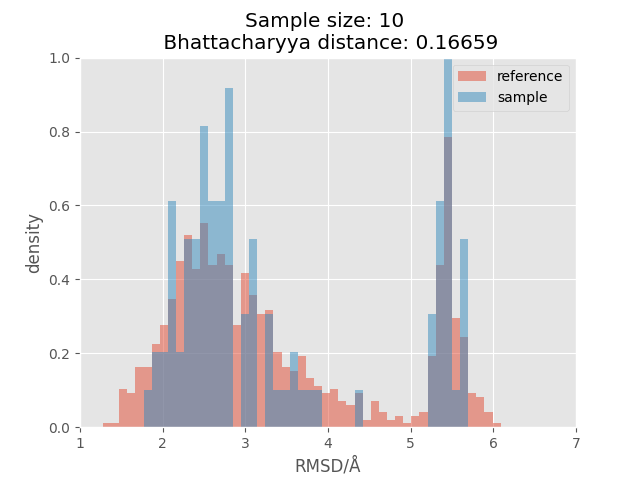

In [18]:
# display table with calculated property for sample size and distribution plot
for fname in os.listdir(temp_dir):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.png':
        display(Image(filename=fpath))
    if ext == '.dat':
        with open(fpath, 'r') as file:
            contents = file.read()
            print(contents)  